**VISUALIZING BIVARIATE NORMAL DISTRIBUTION**

*   JAX
*   Matplotlib



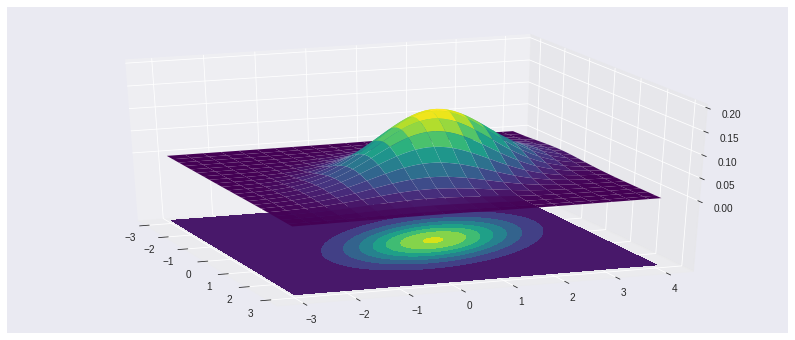

In [30]:
import numpy as np
from jax import grad, jit
from jax import lax
from jax import random
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = jnp.linspace(-3, 3, N)
Y = jnp.linspace(-3, 4, N)
X, Y = jnp.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = jnp.array([0., 1.])
Sigma = jnp.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = jnp.linalg.det(Sigma)
    Sigma_inv = jnp.linalg.inv(Sigma)
    N = jnp.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = jnp.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return jnp.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()